#Actividad Individual 4 Módulo 5


#Ejercicios planteados

El archivo rrhh.csv contiene información de la situación laboral de los trabajadores de la empresa ABAC. Las variables disponibles son:

● Estado: Estado actual del trabajador en la empresa (1: desvinculado, 0: vinculado).

● Edad: Edad del trabajador en años.

● Ratio.Pago: Medida de pago por hora (numerico)

● Salario: Salario mensual en dólares que tiene o tenía el trabajador

● Dias.trabajados: Días que lleva o llevaba trabajando en la empresa

● Ausencias: Días que ha faltado a trabajar

● Sexo: Sexo del trabajador (Female , Male)

● Estado.Civil: Estado civil del trabajador (1: divorciado, 2: casado,3: separado, 4: soltero, 5: viuda)

● Departamento: Lugar de trabajo en la empresa (Admin Offices,..)

● Posicion: Cargo del trabajador/empleado (Accountant I ,.... )

● Desempeño: Clasificación del desempeño del trabajador.

#1. 
Cargue los datos y ...

In [1869]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.preprocessing import OrdinalEncoder
from sklearn.metrics import precision_score
from sklearn.metrics import roc_curve, roc_auc_score
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import f1_score
from sklearn.metrics import auc
from sklearn.preprocessing import OrdinalEncoder
from sklearn.decomposition import PCA
from scipy import stats

In [1870]:
# lee datos
empleados_df = pd.read_csv("./CD-M5-AE4-rrhh.csv")

In [1871]:
# funciones para procesar datos
##################################################################
# define funcion imprime matriz de confusión
def plotMC(y_test, y_pred):
  """
    funcion plotea matriz de confusión
    input: y_test, Y_pred
    output: matriz de confusión
  """
  # plot confusion matrix
  # create confusion matrix
  cm = confusion_matrix(y_test, y_pred)
  # plot confusion matrix
  sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=True)
  plt.xlabel('Predicted')
  plt.ylabel('Actual')
  plt.title('Confusion Matrix')

# define funcion normaliza variables
def normaliza(empleados_df):
  """
    función para normalizar variables explicativas en 2 etapas
    1ra aplica algoritmo minmaxscaler, uniformar valores misma escala
    2da aplica algoritmo scaler, distribución gausiana y eliminar utlier
    input: dataframe_empleado
    output: dataframe_empleado_normalizado
  """
  # Conversion de los datos a numpy array
  valores = empleados_df.values
  # Construcion de escalador
  scaler = MinMaxScaler(feature_range=(0, 1))
  scaler = scaler.fit(valores)
  # Escalamiento de los valores
  normalizados = scaler.transform(valores)
  df_normalizados = pd.DataFrame(normalizados,
                                index=empleados_df.index,
                                columns=empleados_df.columns)
  return df_normalizados

# define funcion para separar datos de entrenamiento y prueba
def splitDatos(df, size):
  """
    función para desaparar datos de entramiento y testeo
    input: dataframe y tamaño % datos de testeo
    output: X_train, X_test, y_train, y_test
  """
  y = np.array(df.Estado)
  X = np.array(df.drop(columns='Estado'))
  # Split the data into training and testing sets
  (
      X_train, X_test,
      y_train, y_test
  ) = train_test_split(
      X, y,
      test_size=size,
      random_state=0
  )
  return X_train, X_test, y_train, y_test

# define funcion para entrenar modelo utilizando KN
def predice_Reg_Log(X_train, y_train, y_test, max_iter):
  """
    función para aplicar modelo Regresión Logística
    input: X_train, y_train, kn
    output: y_pred
  """
  # Create the logistic regression model
  model = LogisticRegression(max_iter=max_iter)
  # Train the model
  model.fit(X_train, y_train)
  # Make predictions
  y_pred = model.predict(X_test)
  return y_pred

# define funcion mostrar exactitud predicción
def metricas(y_test, y_pred):
  """
  función para desplegar métricas
  """
  accuracy = accuracy_score(y_test, y_pred)
  print(f"Accuracy: {accuracy:.4f}")
  precision = precision_score(y_test, y_pred, average='macro')
  print(f"Precision: {precision:.4f}")
  # Mean Squared Error (MSE)
  mse = mean_squared_error(y_test, y_pred)
  print("Mean Squared Error (MSE):", mse)
  # Root Mean Squared Error (RMSE)
  rmse = mean_squared_error(y_test, y_pred, squared=False)
  print("Root Mean Squared Error (RMSE):", rmse)
  # Mean Absolute Deviation (MAD)
  mad = mean_absolute_error(y_test, y_pred)
  print("Mean Absolute Deviation (MAD):", mad)

# define funcion muestra curva ROC
def show_roc_curve(X_train, y_train, y_test):
  # generate a no skill prediction (majority class)
  ns_probs = [0 for _ in range(len(y_test))]
  # fit a model
  model = LogisticRegression(solver='lbfgs')
  model.fit(X_train, y_train)
  # predict probabilities
  lr_probs = model.predict_proba(X_test)
  # keep probabilities for the positive outcome only
  lr_probs = lr_probs[:, 1]
  # calculate scores
  ns_auc = roc_auc_score(y_test, ns_probs)
  lr_auc = roc_auc_score(y_test, y_pred)
  # summarize scores
  print('No Skill: ROC AUC=%.3f' % (ns_auc))
  print('Logistic: ROC AUC=%.3f' % (lr_auc))
  # calculate roc curves
  ns_fpr, ns_tpr, _ = roc_curve(y_test, ns_probs)
  lr_fpr, lr_tpr, _ = roc_curve(y_test, y_pred)
  # plot the roc curve for the model
  plt.plot(ns_fpr, ns_tpr, linestyle='--', label='No Skill')
  plt.plot(lr_fpr, lr_tpr, marker='.', label='Logistic')
  # axis labels
  plt.xlabel('False Positive Rate')
  plt.ylabel('True Positive Rate')
  # show the legend
  plt.legend()
  # show the plot
  plt.show()

# calculate roc curve
def calculaRocCurve(y_test, y_pred):
  fpr, tpr, thresholds = roc_curve(y_test, y_pred)
  #create ROC curve
  plt.plot(fpr,tpr)
  plt.ylabel('True Positive Rate')
  plt.xlabel('False Positive Rate')
  plt.show()

# calculate AUC
def calculaAUC(y_test, y_pred):
  auc = roc_auc_score(y_test, y_pred)
  print('AUC: %.3f' % auc)

# precision-recall curve and f1
def precision_recall(X_train, X_test, y_train, y_test):
  # fit a model
  model = LogisticRegression(solver='lbfgs')
  model.fit(X_train, y_train)
  # predict probabilities
  lr_probs = model.predict_proba(X_test)
  # keep probabilities for the positive outcome only
  lr_probs = lr_probs[:, 1]
  # predict class values
  yhat = model.predict(X_test)
  lr_precision, lr_recall, _ = precision_recall_curve(y_test, lr_probs)
  lr_f1, lr_auc = f1_score(y_test, yhat), auc(lr_recall, lr_precision)
  # summarize scores
  print('Logistic: f1=%.3f auc=%.3f' % (lr_f1, lr_auc))
  # plot the precision-recall curves
  no_skill = len(y_test[y_test==1]) / len(y_test)
  plt.plot([0, 1], [no_skill, no_skill], linestyle='--', label='No Skill')
  plt.plot(lr_recall, lr_precision, marker='.', label='Logistic')
  # axis labels
  plt.xlabel('Recall')
  plt.ylabel('Precision')
  # show the legend
  plt.legend()
  # show the plot
  plt.show()

# define funcion conviertiendo variable desempeño a numerica 
def encode_desempeno_categoricas(empleados_df):
  """
    función para codificar variable categórica
    de tipo ordinal por lo que su orden importa
    input: dataframe
    output: dataframe codifcado
  """
  # Creamos el codificador indicandole el orden de la variables
  encoder = OrdinalEncoder(categories=[[
      "N/A- too early to review",
      "90-day meets",
      "PIP",
      "Needs Improvement",
      "Fully Meets",
      "Exceeds",
      "Exceptional"
      ]])
  # Ajustamos el codificador con la variable y la transformamos
  encoder.fit(empleados_df[["Desempeño"]])
  empleados_df["desempeño"] = encoder.transform(empleados_df[["Desempeño"]])
  return empleados_df

# define funcion conviertiendo variable departamento a numerica
def encode_departamento_categoricas(empleados_df):
  """
    función para codificar variable categórica
    de tipo ordinal por lo que su orden importa 
    input: dataframe
    output: dataframe codifcado
  """
  encoder = OrdinalEncoder(categories=[[
    "Admin Offices",
    "Sales",
    "IT/IS",
    "Software Engineering",
    "Production",
    "Executive Office"
    ]])
  # Ajustamos el codificador con la variable y la transformamos
  encoder.fit(empleados_df[["Departamento"]])
  empleados_df["departamento"] = encoder.transform(empleados_df[["Departamento"]])
  return empleados_df

# define funcion conviertiendo variable posicion a numerica
def encode_posicion_categoricas(empleados_df):
  """
    función para codificar variable categórica
    de tipo ordinal por lo que su orden importa 
    input: dataframe
    output: dataframe codifcado
  """
  encoder = OrdinalEncoder(categories=[[
            "Administrative Assistant",
            "IT Support",
            "Production Technician I",
            "Production Technician II",
            "Accountant I",
            "Sales Manager",
            "Area Sales Manager",
            "Sr. Accountant",
            "Database Administrator",
            "BI Developer",
            "Senior BI Developer",
            "IT Manager - DB",
            "IT Manager - Support",
            "Network Engineer",
            "Sr. Network Engineer",
            "IT Manager - Infra",
            "Sr. DBA",
            "Software Engineer",
            "Software Engineering Manager",
            "Production Manager",
            "BI Director",
            "Data Architect",
            "Shared Services Manager",
            "Director of Sales",
            "IT Director",
            "Director of Operations",
            "CIO",
            "President & CEO"
  ]])
  # Ajustamos el codificador con la variable y la transformamos
  encoder.fit(empleados_df[["Posicion"]])
  empleados_df["posicion"] = encoder.transform(empleados_df[["Posicion"]])
  return empleados_df

# define funcion conviertiendo variable sexo a binaria
def encode_estado_civil_categoricas(empleados_df):
  """
    función para codificar variables categórica
    de tipo nominal por lo que su orden importa 
    input: dataframe
    output: dataframe codifcado
  """
  # Creamos las variables binarias
  ec_dummies = pd.get_dummies(empleados_df['Estado.Civil'])
  # Añadimos las variables binarias al DataFrame
  empleados_df = pd.concat([empleados_df, ec_dummies], axis = 1)
  return empleados_df

# define funcion conviertiendo variable estado civil a binaria
def encode_sexo_categoricas(empleados_df):
  """
    función para codificar variables categórica
    de tipo nominal por lo que su orden importa 
    input: dataframe
    output: dataframe codifcado
  """
  # Creamos las variables binarias
  sexo_dummies = pd.get_dummies(empleados_df['Sexo'])
  # Añadimos las variables binarias al DataFrame
  empleados_df = pd.concat([empleados_df, sexo_dummies], axis = 1)
  return empleados_df


def encode_categoricas(empleados_df):
  """
    función para codificar variables categórica
    de tipo ordinal y nominal 
    input: dataframe
    output: dataframe codifcado
  """
  empleados_df = encode_desempeno_categoricas(empleados_df)
  empleaods_df = encode_departamento_categoricas(empleados_df)
  empleados_df = encode_posicion_categoricas(empleados_df)
  empleados_df = encode_estado_civil_categoricas(empleados_df)
  empleados_df = encode_sexo_categoricas(empleados_df)
  # eliminando las columnas categóricas originales
  empleados_df.drop(["Sexo","Departamento","Posicion","Desempeño","Estado.Civil"], axis=1, inplace=True)
  return empleados_df

def elimina_outliers(empleados_df, variable):
  ''' Detection '''
  # IQR
  Q1 = np.percentile(empleados_df[variable], 25,
                    method = 'midpoint')
  Q3 = np.percentile(empleados_df[variable], 75,
                    method = 'midpoint')
  IQR = Q3 - Q1

  try:
    # Upper bound
    upper = np.where(empleados_df[variable] >= (Q3+1.5*IQR))
    # Lower bound
    lower = np.where(empleados_df[variable] <= (Q1-1.5*IQR))
    ''' Removing the Outliers '''
    empleados_df.drop(upper[0], inplace=True)
    empleados_df.drop(lower[0], inplace=True)

    return empleados_df
  except:
    #no quedan elementos outliers producto de anterior eliminacion de registros
    return empleados_df

#1. 
revise los formatos de cada variable, recuerde codificar las variables como numéricas o factores según corresponda.

In [1872]:
# formatos de variables
empleados_df.dtypes

Estado               int64
Edad               float64
Ratio.Pago         float64
Salario            float64
Dias.trabajados      int64
Ausencias            int64
Sexo                object
Estado.Civil         int64
Departamento        object
Posicion            object
Desempeño           object
dtype: object

In [1873]:
# Revisando variables categoricas nominales y ordinales
# variables a ser codificadas
empleados_df["Estado.Civil"].value_counts().to_frame()

,Estado.Civil
4,137
2,123
1,30
3,12
5,8


In [1874]:
empleados_df.describe(include=['object'])

,Sexo,Departamento,Posicion,Desempeño
count,310,310,310,310
unique,2,6,28,7
top,Female,Production,Production Technician I,Fully Meets
freq,177,208,136,181


In [1875]:
empleados_df[["Sexo","Departamento","Posicion","Desempeño"]].value_counts().to_frame()

0
Sexo   Departamento         Posicion                     Desempeño                   
Female Production           Production Technician I      Fully Meets               48
Male   Production           Production Technician I      Fully Meets               30
Female Production           Production Technician II     Fully Meets               17
Male   Production           Production Technician II     Fully Meets               15
Female Production           Production Technician I      N/A- too early to review  13
...                                                                                ..
Male   IT/IS                Database Administrator       Exceptional                1
                                                         Fully Meets                1
                            IT Director                  Exceptional                1
                            IT Manager - Infra           Needs Improvement          1
       Software Engineering Software Engineering Manager Fully Meets                1

[94 rows x 1 columns]

In [1876]:
empleados_df["Sexo"].value_counts()

Female    177
Male      133
Name: Sexo, dtype: int64

In [1877]:
empleados_df["Departamento"].value_counts()

Production              208
IT/IS                    50
Sales                    31
Admin Offices            10
Software Engineering     10
Executive Office          1
Name: Departamento, dtype: int64

In [1878]:
empleados_df["Posicion"].value_counts()

Production Technician I         136
Production Technician II         57
Area Sales Manager               27
Production Manager               14
Database Administrator           13
Software Engineer                 9
Network Engineer                  9
Sr. Network Engineer              5
BI Developer                      4
IT Support                        4
Sr. DBA                           4
Administrative Assistant          3
Senior BI Developer               3
Sales Manager                     3
Accountant I                      3
IT Manager - DB                   2
Sr. Accountant                    2
Shared Services Manager           2
Director of Operations            1
IT Manager - Support              1
IT Manager - Infra                1
IT Director                       1
Director of Sales                 1
CIO                               1
President & CEO                   1
Software Engineering Manager      1
BI Director                       1
Data Architect              

In [1879]:
empleados_df["Desempeño"].value_counts()

Fully Meets                 181
N/A- too early to review     37
90-day meets                 31
Exceeds                      28
Needs Improvement            15
Exceptional                   9
PIP                           9
Name: Desempeño, dtype: int64

Se observan valores muy dispersos en las variable categóricas por lo que para incluirlas en el proceso se transfaran a numérica empleando una función de pandas para este tipo de conversiones 

In [1880]:
empleados_df.Desempeño.value_counts()

Fully Meets                 181
N/A- too early to review     37
90-day meets                 31
Exceeds                      28
Needs Improvement            15
Exceptional                   9
PIP                           9
Name: Desempeño, dtype: int64

When evaluating performance, the following is a general order of performance ratings from lowest to highest:

Needs Improvement, Partially Meets, Fully Meet, Exceeds, Exceptional, PIP (Performance Improvement Plan), N/A (Not Applicable) or Too Early to Review, 

In [1881]:
empleados_df.Departamento.value_counts()

Production              208
IT/IS                    50
Sales                    31
Admin Offices            10
Software Engineering     10
Executive Office          1
Name: Departamento, dtype: int64

The ordinal order of the given departments, starting from the lowest rank to the highest rank, would be:

Admin Offices - Sales - IT/IS (Information Technology/Information Systems) - Software Engineering - Production - Executive Office

Note that the order may vary depending on the organization and its specific structure.

In [1882]:
empleados_df.Posicion.value_counts()

Production Technician I         136
Production Technician II         57
Area Sales Manager               27
Production Manager               14
Database Administrator           13
Software Engineer                 9
Network Engineer                  9
Sr. Network Engineer              5
BI Developer                      4
IT Support                        4
Sr. DBA                           4
Administrative Assistant          3
Senior BI Developer               3
Sales Manager                     3
Accountant I                      3
IT Manager - DB                   2
Sr. Accountant                    2
Shared Services Manager           2
Director of Operations            1
IT Manager - Support              1
IT Manager - Infra                1
IT Director                       1
Director of Sales                 1
CIO                               1
President & CEO                   1
Software Engineering Manager      1
BI Director                       1
Data Architect              

the ordered list of positions, starting from the lowest rank to the highest rank:

Administrative Assistant
IT Support
Production Technician I
Production Technician II
Accountant I
Sales Manager
Area Sales Manager
Sr. Accountant
Database Administrator
BI Developer
Senior BI Developer
IT Manager - DB (Database Manager)
IT Manager - Support (IT Support Manager)
Network Engineer
Sr. Network Engineer
IT Manager - Infra (Infrastructure Manager)
Sr. DBA (Senior Database Administrator)
Software Engineer
Software Engineering Manager
Production Manager
BI Director
Data Architect
Shared Services Manager
Director of Sales
IT Director
Director of Operations
CIO (Chief Information Officer)
President & CEO (Chief Executive Officer)
Please note that the order may still vary depending on the organization and its specific structure.

In [1883]:
# codifica variables categoricas "Sexo","Departamento","Posicion" y "Desempeño"
empleados_df = encode_categoricas(empleados_df)

#2. 
Realice un análisis descriptivo de sus datos. Determinar si existen observaciones faltantes, en el caso de existir tome la decisión de omitirlas del estudio u omitir la variable. Evalúe si existen posibles incongruencias en la fuente de datos (ej: edades negativas).

In [1884]:
empleados_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 310 entries, 0 to 309
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Estado           310 non-null    int64  
 1   Edad             310 non-null    float64
 2   Ratio.Pago       310 non-null    float64
 3   Salario          310 non-null    float64
 4   Dias.trabajados  310 non-null    int64  
 5   Ausencias        310 non-null    int64  
 6   desempeño        310 non-null    float64
 7   departamento     310 non-null    float64
 8   posicion         310 non-null    float64
 9   1                310 non-null    uint8  
 10  2                310 non-null    uint8  
 11  3                310 non-null    uint8  
 12  4                310 non-null    uint8  
 13  5                310 non-null    uint8  
 14  Female           310 non-null    uint8  
 15  Male             310 non-null    uint8  
dtypes: float64(6), int64(3), uint8(7)
memory usage: 24.0 KB


In [1885]:
empleados_df.describe()

,Estado,Edad,Ratio.Pago,Salario,Dias.trabajados,Ausencias,desempeño,departamento,posicion,1,2,3,4,5,Female,Male
count,310.000000,310.000000,310.000000,310.000000,310.000000,310.000000,310.000000,310.000000,310.000000,310.000000,310.000000,310.000000,310.000000,310.000000,310.000000,310.000000
mean,0.409677,38.867742,31.284806,4606.534839,1296.080645,10.264516,3.264516,3.219355,5.700000,0.096774,0.396774,0.038710,0.441935,0.025806,0.570968,0.429032
std,0.492569,8.922459,15.383615,1677.350176,769.491382,5.843235,1.627345,1.221549,5.883744,0.296128,0.490019,0.193214,0.497420,0.158814,0.495738,0.495738
min,0.000000,25.000000,14.000000,3004.600000,2.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,32.000000,20.000000,3707.033333,766.250000,5.000000,3.000000,2.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,37.000000,24.000000,4190.666667,1238.000000,10.000000,4.000000,4.000000,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
75%,1.000000,44.000000,45.315000,4804.733333,1732.750000,15.000000,4.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.000000,1.000000,1.000000
max,1.000000,67.000000,80.000000,16666.666667,4339.000000,20.000000,6.000000,5.000000,27.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [1886]:
# ver correlation entre las variables numéricas sin preprocesar
empleados_df.corr()

,Estado,Edad,Ratio.Pago,Salario,Dias.trabajados,Ausencias,desempeño,departamento,posicion,1,2,3,4,5,Female,Male
Estado,1.000000,0.105150,-0.199385,-0.008386,-0.494966,0.006079,-0.184076,0.232040,-0.135004,0.082306,0.102030,-0.031152,-0.146954,0.029893,0.046215,-0.046215
Edad,0.105150,1.000000,0.017469,0.097842,0.017666,0.033944,0.155538,0.112829,0.058915,0.004860,-0.016086,0.081823,-0.026163,0.022971,0.012006,-0.012006
Ratio.Pago,-0.199385,0.017469,1.000000,0.031219,0.044320,-0.029453,0.068351,-0.663766,0.780267,-0.099488,0.026342,-0.020053,0.051250,-0.031895,-0.136151,0.136151
Salario,-0.008386,0.097842,0.031219,1.000000,-0.081338,0.078408,0.020269,0.003791,0.058799,0.009130,-0.002859,0.007702,-0.000821,-0.015002,-0.066264,0.066264
Dias.trabajados,-0.494966,0.017666,0.044320,-0.081338,1.000000,0.015271,0.376237,-0.015030,0.011602,-0.082322,-0.052620,0.106398,0.088811,-0.091750,0.026094,-0.026094
Ausencias,0.006079,0.033944,-0.029453,0.078408,0.015271,1.000000,0.089954,-0.023117,-0.076378,0.076802,-0.050336,0.002367,0.025343,-0.070153,-0.019908,0.019908
desempeño,-0.184076,0.155538,0.068351,0.020269,0.376237,0.089954,1.000000,0.022813,0.084025,0.007149,-0.050873,0.049670,0.059015,-0.101630,-0.079506,0.079506
departamento,0.232040,0.112829,-0.663766,0.003791,-0.015030,-0.023117,0.022813,1.000000,-0.348782,0.075323,-0.048554,0.018754,-0.010927,0.020772,0.107814,-0.107814
posicion,-0.135004,0.058915,0.780267,0.058799,0.011602,-0.076378,0.084025,-0.348782,1.000000,-0.035291,0.061624,-0.058074,-0.004312,-0.040175,-0.115279,0.115279
1,0.082306,0.004860,-0.099488,0.009130,-0.082322,0.076802,0.007149,0.075323,-0.035291,1.000000,-0.265469,-0.065685,-0.291285,-0.053275,-0.024889,0.024889


<Axes: >

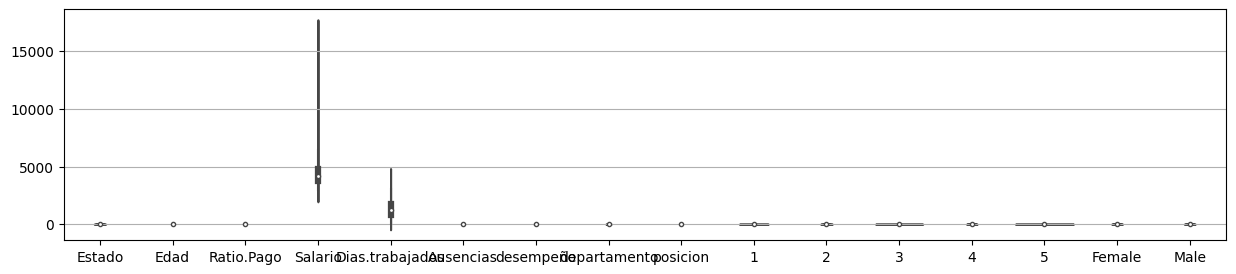

In [1887]:
# compara rango de datos
plt.figure(figsize = (15,3))
plt.grid()
sns.violinplot(data=empleados_df)

Se puede observar el orden de magnitud es my distinto entre la variable "Salario" y "Dias.trabajados" respecto a otras variables, por lo que se normalizará realizando un escalado de todas las variables.

In [1888]:
# normaliza a variables numéricas
empleados_df = normaliza(empleados_df)

<Axes: >

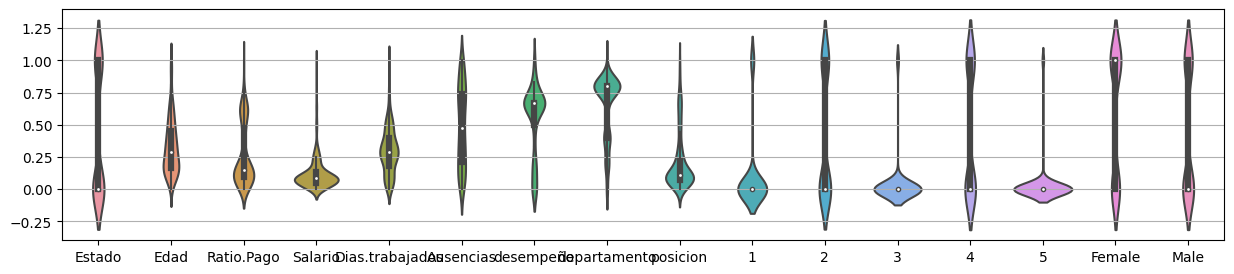

In [1889]:
# visualiza 
plt.figure(figsize = (15,3))
plt.grid()
sns.violinplot(data=empleados_df)

In [1890]:
# ver correlation entre las variables numéricas
matriz_correlación=empleados_df.corr()

<Axes: >

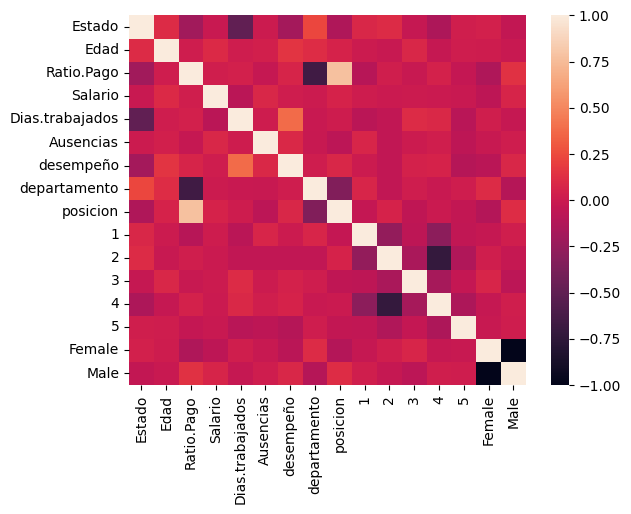

In [1891]:
sns.heatmap(matriz_correlación)

In [1892]:
# correlación Pearson
pearson_coef, p_value = stats.pearsonr(empleados_df['Dias.trabajados'], empleados_df['Estado'])
print("El coeficiente de correlación Pearson is", pearson_coef, " con un valor P de P =", p_value)

El coeficiente de correlación Pearson is -0.4949662129865242  con un valor P de P = 1.4557935580235917e-20


In [1893]:
# correlacion inversa entre Estado y Dias trabajados.
empleados_df[['Estado','Dias.trabajados']].corr()

,Estado,Dias.trabajados
Estado,1.000000,-0.494966
Dias.trabajados,-0.494966,1.000000


#Y finalmente 
análice la presencia de valores atípicos en las variables. Comente.

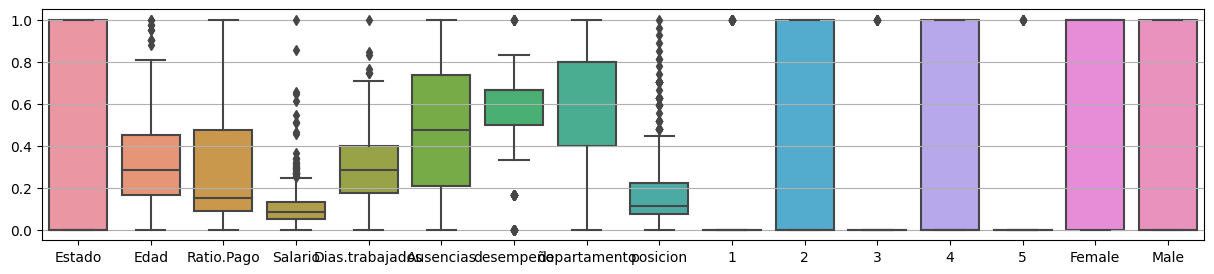

In [1894]:
# visualiza datos outliers
plt.figure(figsize = (15,3))
plt.grid()
p = sns.boxplot(data=empleados_df)

Se observan valores atípicos pero se toma la determinación de no eliminar valores outliers porque en el caso de los salarios y dias trabajados se considera que no corresponden a errores de digitación sino que estan relacionados con el "Departamento" y la "Posicion" que ocupan dentro de la empresa

In [1895]:
# no se eliminan datos outliers
#print("registros antes de la eliminación de ouitliers: ", empleados_df.shape[0])
#empleados_df=elimina_outliers(empleados_df, 'Salario')
#empleados_df=elimina_outliers(empleados_df, 'Dias.trabajados')
#print("registros despúes de la eliminación de ouitliers: ", empleados_df.shape[0])

#3. 
Realice análisis de cómo se relacionan las variables continuas con la variable de interés. Acompañe con gráficos y estadísticas. 

In [1896]:
# En base al dataframe codificado y estandarizado se consiguen nuevos set de datos para procesar

# se intenta trabajar con las variables continuas eliminando las columnas categóricas
empleados_continuas_df=pd.DataFrame(empleados_df.drop(["Female","Male","departamento","posicion","desempeño",1,2,3,4,5], axis=1))

In [1897]:
empleados_continuas_df.columns.values

array(['Estado', 'Edad', 'Ratio.Pago', 'Salario', 'Dias.trabajados',
       'Ausencias'], dtype=object)

In [1898]:
# visuliza correlacion entre "Estado","Edad","Ratio.Pago","Salario","Dias.trabajados","Ausencias"
empleados_continuas_df.corr()

,Estado,Edad,Ratio.Pago,Salario,Dias.trabajados,Ausencias
Estado,1.000000,0.105150,-0.199385,-0.008386,-0.494966,0.006079
Edad,0.105150,1.000000,0.017469,0.097842,0.017666,0.033944
Ratio.Pago,-0.199385,0.017469,1.000000,0.031219,0.044320,-0.029453
Salario,-0.008386,0.097842,0.031219,1.000000,-0.081338,0.078408
Dias.trabajados,-0.494966,0.017666,0.044320,-0.081338,1.000000,0.015271
Ausencias,0.006079,0.033944,-0.029453,0.078408,0.015271,1.000000


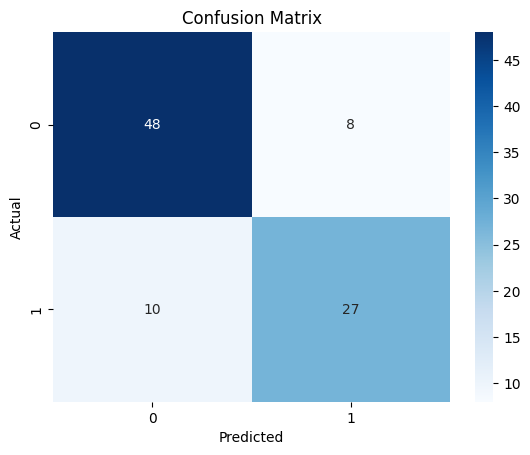

In [1899]:
# preparación de datos de entrenamiento y prueba
X_train, X_test, y_train, y_test = splitDatos(empleados_continuas_df, 0.3)

# predice utiizando modelo KN
y_pred = predice_Reg_Log(X_train, y_train, y_test, 1000)

# plot confusion matrix
plotMC(y_test, y_pred)

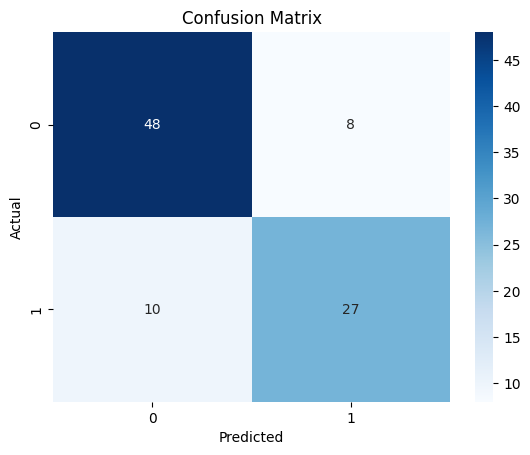

In [1900]:
# predice utiizando modelo KN
y_pred = predice_Reg_Log(X_train, y_train, y_test, 2000)
# plot confusion matrix
plotMC(y_test, y_pred)

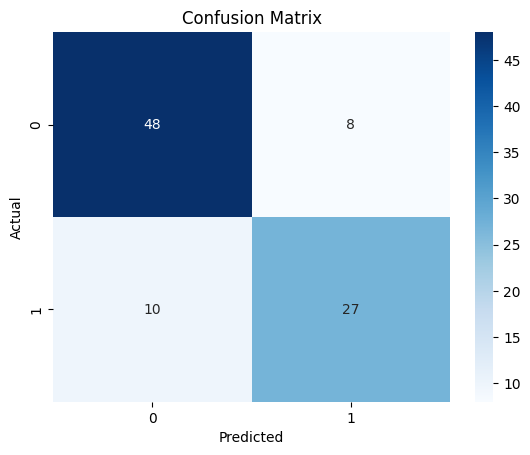

In [1901]:
# predice utiizando modelo KN
y_pred = predice_Reg_Log(X_train, y_train, y_test, 3000)
# plot confusion matrix
plotMC(y_test, y_pred)

In [1902]:
# visualiza métricas obtenidas
metricas(y_test, y_pred)

Accuracy: 0.8065
Precision: 0.7995
Mean Squared Error (MSE): 0.1935483870967742
Root Mean Squared Error (RMSE): 0.43994134506405985
Mean Absolute Deviation (MAD): 0.1935483870967742


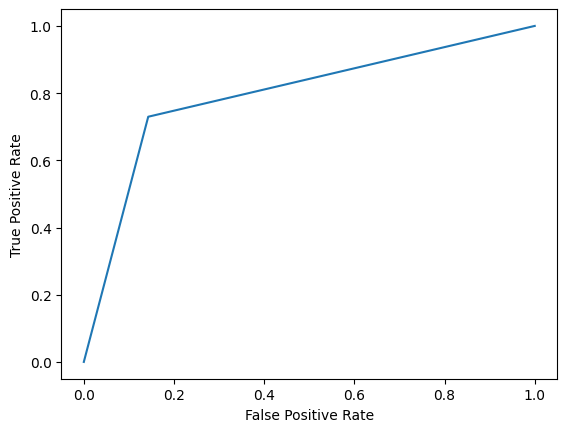

AUC: 0.793


In [1903]:
# calculate roc curve
calculaRocCurve(y_test, y_pred)

# calculate AUC
calculaAUC(y_test, y_pred)

No Skill: ROC AUC=0.500
Logistic: ROC AUC=0.793


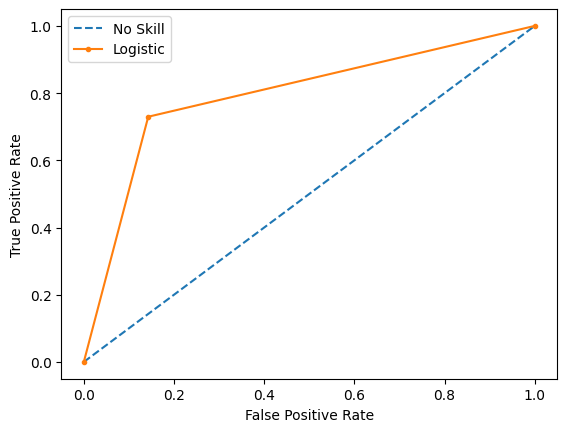

In [1904]:
# graficas curva ROC
show_roc_curve(X_train, y_train, y_test)

Logistic: f1=0.750 auc=0.847


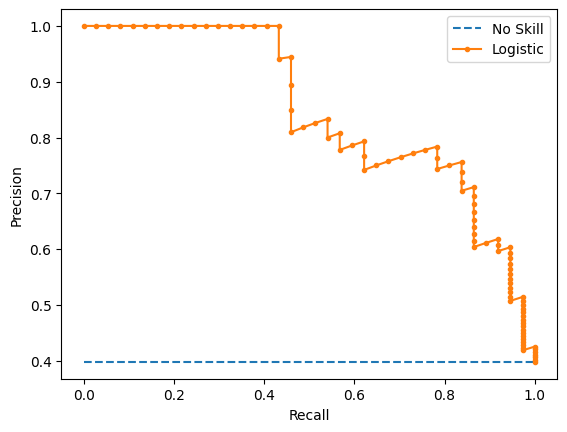

In [1905]:
# Recall (Sensitivity or True Positive Rate, TPR)
precision_recall(X_train, X_test, y_train, y_test)

¿Qué variables pudieran resultar significativas a la hora de modelar la probabilidad de que el trabajador sea desvinculado a la empresa?

In [1906]:
# Creo que la variable "Dias Trabajados" resulta ser significativa a la hora de modelar la probabilidad de desvincular a un trabajador.

#4. 
Realice análisis de cómo se relacionan las variables categóricas con la variable de interés. Acompañe con gráficos y estadísticas. 

In [1907]:
# En base al dataframe codificado y estandarizado se consiguen nuevos set de datos para procesar

# se intenta trabajar con las variables categóricas eliminando las columnas continuas
empleados_categorias_df=pd.DataFrame(empleados_df.drop(["Edad","Ratio.Pago","Salario","Dias.trabajados","Ausencias"], axis=1))

In [1908]:
# visualiza correlacion
empleados_categorias_df.corr()

,Estado,desempeño,departamento,posicion,1,2,3,4,5,Female,Male
Estado,1.000000,-0.184076,0.232040,-0.135004,0.082306,0.102030,-0.031152,-0.146954,0.029893,0.046215,-0.046215
desempeño,-0.184076,1.000000,0.022813,0.084025,0.007149,-0.050873,0.049670,0.059015,-0.101630,-0.079506,0.079506
departamento,0.232040,0.022813,1.000000,-0.348782,0.075323,-0.048554,0.018754,-0.010927,0.020772,0.107814,-0.107814
posicion,-0.135004,0.084025,-0.348782,1.000000,-0.035291,0.061624,-0.058074,-0.004312,-0.040175,-0.115279,0.115279
1,0.082306,0.007149,0.075323,-0.035291,1.000000,-0.265469,-0.065685,-0.291285,-0.053275,-0.024889,0.024889
2,0.102030,-0.050873,-0.048554,0.061624,-0.265469,1.000000,-0.162747,-0.721720,-0.132000,0.023593,-0.023593
3,-0.031152,0.049670,0.018754,-0.058074,-0.065685,-0.162747,1.000000,-0.178575,-0.032661,0.072588,-0.072588
4,-0.146954,0.059015,-0.010927,-0.004312,-0.291285,-0.721720,-0.178575,1.000000,-0.144837,-0.029169,0.029169
5,0.029893,-0.101630,0.020772,-0.040175,-0.053275,-0.132000,-0.032661,-0.144837,1.000000,-0.023337,0.023337
Female,0.046215,-0.079506,0.107814,-0.115279,-0.024889,0.023593,0.072588,-0.029169,-0.023337,1.000000,-1.000000


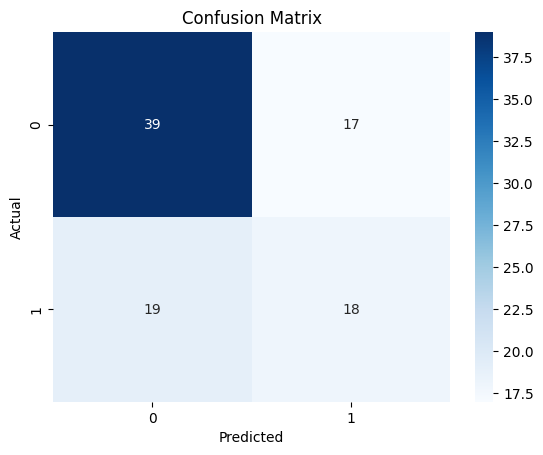

In [1909]:
# preparación de datos de entrenamiento y prueba
X_train, X_test, y_train, y_test = splitDatos(empleados_categorias_df, 0.3)

# predice utiizando modelo KN
y_pred = y_pred = predice_Reg_Log(X_train, y_train, y_test, 1000)

# plot confusion matrix
plotMC(y_test, y_pred)

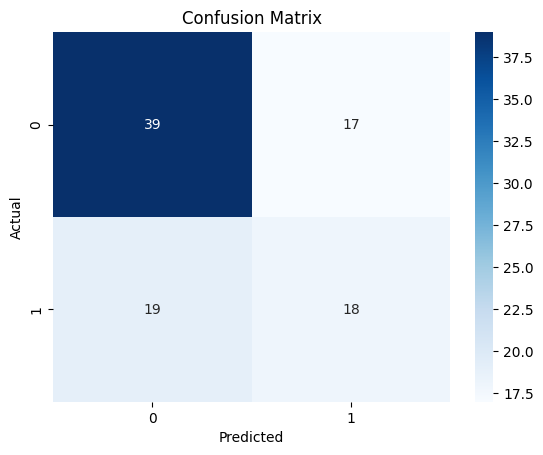

In [1910]:
# predice utiizando modelo KN
y_pred = y_pred = predice_Reg_Log(X_train, y_train, y_test, 2000)
# plot confusion matrix
plotMC(y_test, y_pred)

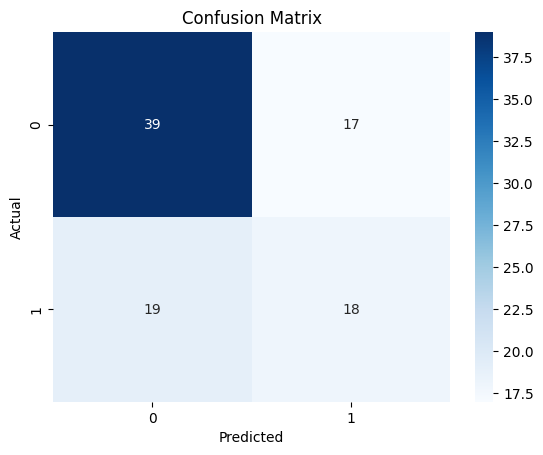

In [1911]:
# predice utiizando modelo KN
y_pred = y_pred = predice_Reg_Log(X_train, y_train, y_test, 3000)
# plot confusion matrix
plotMC(y_test, y_pred)

In [1912]:
# visualiza métricas obtenidas
metricas(y_test, y_pred)

Accuracy: 0.6129
Precision: 0.5933
Mean Squared Error (MSE): 0.3870967741935484
Root Mean Squared Error (RMSE): 0.6221710168382552
Mean Absolute Deviation (MAD): 0.3870967741935484


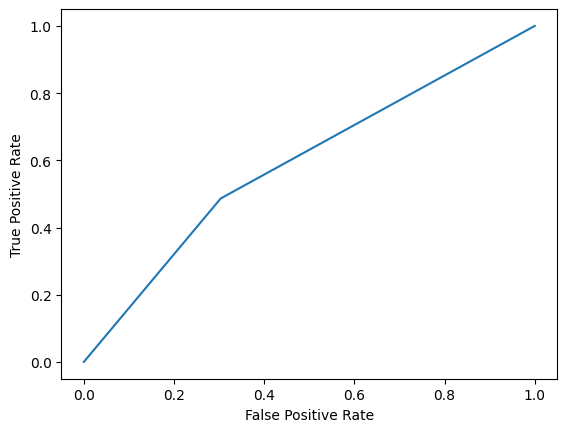

AUC: 0.591


In [1913]:
# calculate roc curve
calculaRocCurve(y_test, y_pred)

# calculate AUC
calculaAUC(y_test, y_pred)

No Skill: ROC AUC=0.500
Logistic: ROC AUC=0.591


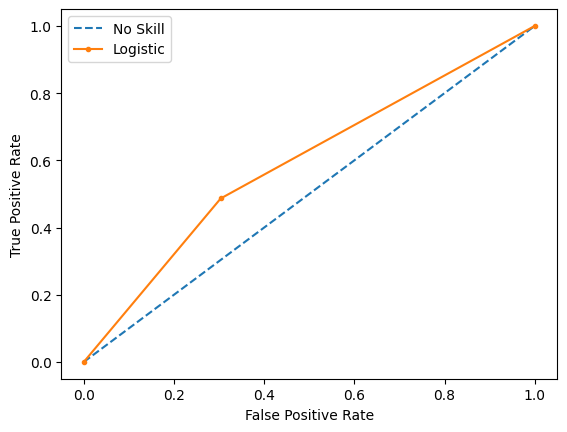

In [1914]:
# graficas curva ROC
show_roc_curve(X_train, y_train, y_test)

Logistic: f1=0.500 auc=0.628


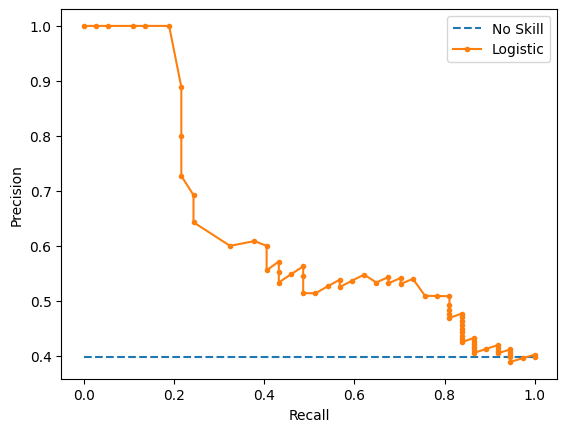

In [1915]:
# Recall (Sensitivity or True Positive Rate, TPR)
precision_recall(X_train, X_test, y_train, y_test)

¿Qué variables pudieran resultar significativas a la hora de modelar la probabilidad de que el trabajador sea desvinculado a la empresa?

In [1916]:
# Paresiera ser que las variable "posición" es más significativa para modelar la probabilidad de que el trabajador sea 
# desvinculado de la Empresa, esto porque hay puestos de trabajo que presentan un mayor número de rotación sobre todo los de
# un nivel inferior respecto a otros de un mayor nivel en un esquema organizacional.

Concluyendo, creo que para este dataset, las variables continuas al obtener mejores métrica, son mejores candidatas para modelar la probabilidad de que un trabajador sea desvinculado.